# Episode Viewing 

This notebook shows the network's performance throughout an epsiode 

In order to run, you will need to have 
* torch
* gymnasium
* numpy
* pygame
* matplotlib 

You will also need access to the classes defined in RLManager.py and MissileEnv.py 

In [1]:
# basic imports 
print("Basic imports...")
import matplotlib.pyplot as plt 
from pathlib import Path 
from importlib import reload 
import time 

# Notebook imports 
from IPython.display import clear_output

# Learning imports 
print("RL imports...")
import torch 
import gymnasium as gym
import pygame

# Custom imports 
print("Custom imports...") 
from RLManager import * 
import RLManager
import MissileEnv

Basic imports...
RL imports...
Custom imports...
Misc Imports...
Torch imports...
Custom imports...
Finished imports.
Device: cpu


In [2]:
def movmean(data, Nmean=50): 
    data = target_impact_lengths
    flat = np.ones(target_impact_lengths.shape)
    avg_filt = np.ones(Nmean) / Nmean
    edge_destroyer = 1 / np.convolve(flat, avg_filt, 'same')
    out = np.convolve(data, avg_filt, 'same') * edge_destroyer
    return out 

Misc Imports...
Torch imports...
Custom imports...
Finished imports.
Device: cpu


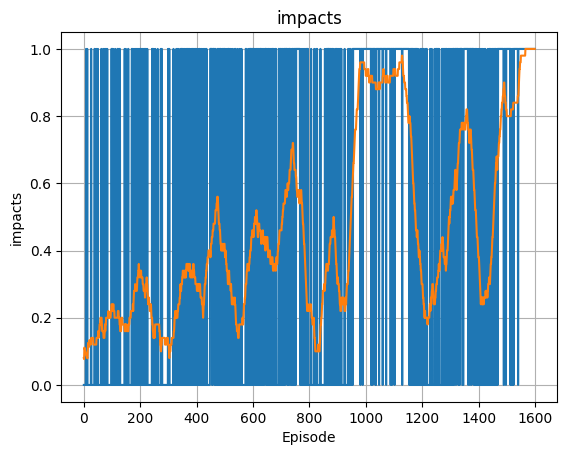

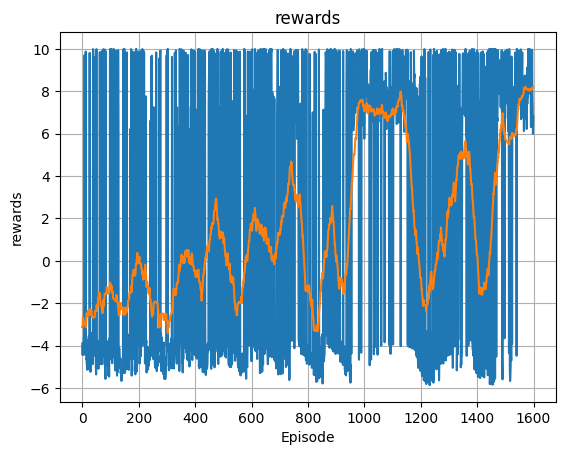

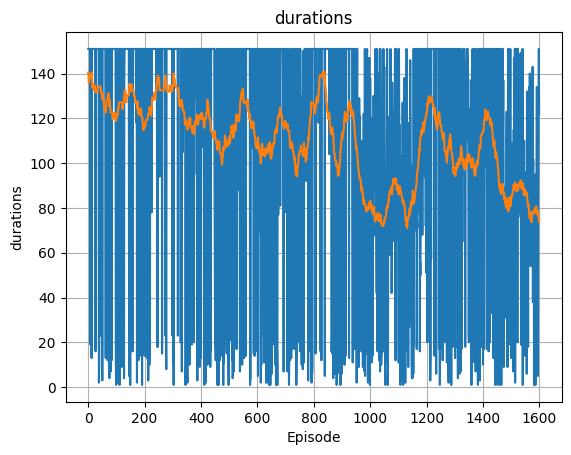

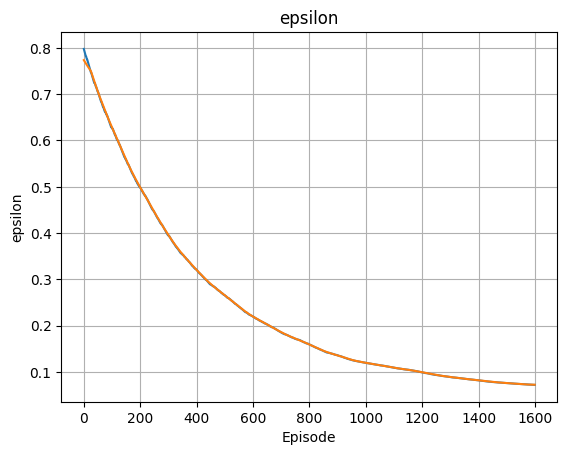

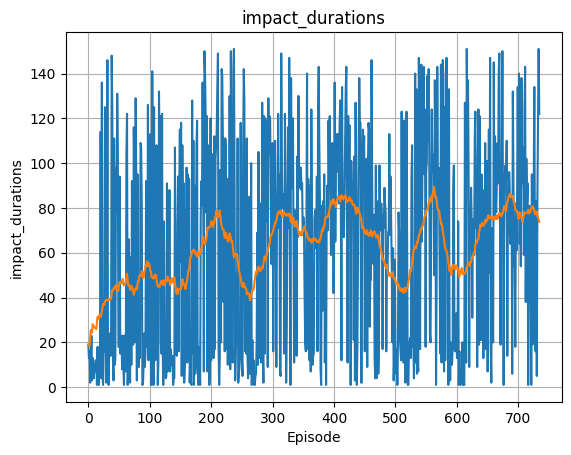

dict_keys(['durations', 'rewards', 'impacts', 'epsilon'])

In [3]:
# Plot training curves 
# def plot_training(path): 
reload(RLManager)

mod_path = Path('GameModel')
data = mod_path / 'ModelStats'
dd = torch.load(data, weights_only=False)
epp = lambda s: RLManager.episode_plot(dd[s], s)
target_impact_lengths = np.array(dd['durations'])[dd['impacts']]

epp('impacts')
plt.show()
epp('rewards')
plt.show()
epp('durations')
plt.show()
epp('epsilon')
plt.show()
RLManager.episode_plot(target_impact_lengths, 'impact_durations')
plt.show()

dd.keys()

In [6]:
# Load the model 
save_loc = Path('GameModel')
# save_loc = Path('Output')
# save_loc = Path("Archive") / "Missile_08_1600e_dist_loss"

model = torch.load(save_loc / 'ModelTorch.pkl', weights_only=False, map_location=device)  # Needs access to DQN class \

# Try reloading the best checkpoint 
use_checkpoint = False
if use_checkpoint: 
    try: 
        weights = torch.load(save_loc / 'CheckpointWeights.wts', weights_only=True, map_location=device)
        model.load_state_dict(weights)
        print("Successfully loaded checkpoint.") 
    except Exception as e: 
        print("Loading weights failed: ") 
        print(e)

In [10]:
# Test the model 
reload(MissileEnv)

# Behavior vars 
pause_frames = False  # Use this to pause every N frames and plot the episode inputs 

# env = gym.make("CartPole-v1", render_mode='human')
# name = 'cart' 

env = MissileEnv.MissileEnv()  # Load the environment 
env.render_mode = 'human'  # enable pygame rendering 
env.follow_missile = False  # True: Center camera on missile, False: Center camera on (0, 0)
env.move_target = True  # Enable random path for target 
env.training_length_frames = 10 * (1/env.dt)  # Maximum episode length (in frames) 
name = 'missile'

observation, info = env.reset()  # initial env setup / reset 

# Other vars 
frames_per_pause = 15  # Frames until pausing and plotting (if enabled) 
n = 500  # Max number of frames for this episode (run @ 30 fps)  
da = (env.action_size-1)/2  # action space multiplier 

# Run the model
actions = []  # array for saving actions 
rewards = []  # array for saving rewards 
tx = []  # target x 
ty = []  # target y 
mx = []  # missile x 
my = []  # missile y 
obs = observation[np.newaxis, :]
for _ in range(n):
    print(f"Step {_}")
    # action = env.action_space.sample()
    state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)
    action = model(state).max(1).indices.view(1, 1)
    actions.append((action.cpu().numpy()[0][0]-da)/da)
    observation,reward, terminated, truncated, info = env.step(action.item())

    # Tracking 
    print(f"obs   : {observation}")
    obs = np.concat((obs, observation[np.newaxis, :]), axis=0)
    rewards.append(reward)
    tx.append(env.target.position.x)
    ty.append(env.target.position.y)
    mx.append(env.missile.position.x)
    my.append(env.missile.position.y)
    
    # Plotting 
    if pause_frames: 
        if (_+1) % frames_per_pause == 0: 
            clear_output()
            plt.plot(actions, '.-')
            plt.plot(obs[:, 4], '.-')
            plt.plot(obs[:, 2], '.-')
            plt.plot(obs[:, 3], '.-')
            plt.plot(rewards, '.-')
            plt.legend(["Action", 'distance', "v_inline", 'v_offline', 'reward'])
            plt.grid()
            plt.show()
        
            x = input("continue?")
            if x == 'quit': 
                break

    # Terminate pygame (hanging window can crash the kernel) 
    if terminated or truncated:
        observation, info = env.reset()
        env.close()
        break

Step 0
obs   : [-0.77828053  0.62791673 -0.47069182  0.88229769  1.        ]
Step 1
obs   : [-0.84083573  0.54129038 -0.54509596  0.83837366  1.        ]
Step 2
obs   : [-0.89258544  0.45087828 -0.61522619  0.78835064  1.        ]
Step 3
obs   : [-0.93373468  0.35796585 -0.68081015  0.73245992  1.        ]
Step 4
obs   : [-0.96460755  0.26368973 -0.74155205  0.67089534  1.        ]
Step 5
obs   : [-0.98560831  0.16904517 -0.79710189  0.60384483  1.        ]
Step 6
obs   : [-0.99719116  0.07489855 -0.84703625  0.53153513  1.        ]
Step 7
obs   : [-0.99983803  0.01799773 -0.89085566  0.45428647  1.        ]
Step 8
obs   : [-0.99404286  0.10898991 -0.92800377  0.37257081  1.        ]
Step 9
obs   : [-0.9803012   0.19750836 -0.95791146  0.28706383  1.        ]
Step 10
obs   : [-0.95910385  0.28305444 -0.98006495  0.19867735  1.        ]
Step 11
obs   : [-0.93093334  0.36518915 -0.99409006  0.1085585   1.        ]
Step 12
obs   : [-0.89626268  0.44352364 -0.99983716  0.01804579  1.      

In [ ]:
# Close the pygame window 
pygame.quit()  # Useful for if ^ code runs into an error / fails before quitting 

Note: Starting positions are marked with a star


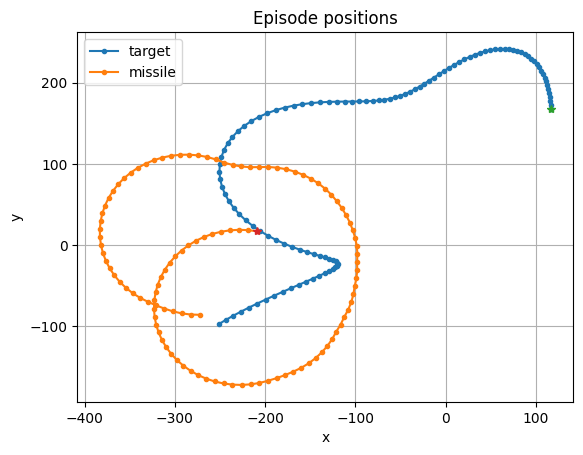

In [13]:
# Plot position over time 
plt.plot(tx, ty, '.-')
plt.plot(mx, my, '.-')
plt.plot(tx[0], ty[0], '*')
plt.plot(mx[0], my[0], '*')
plt.legend(['target', 'missile'])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Episode positions")
plt.grid()
print("Note: Starting positions are marked with a star")

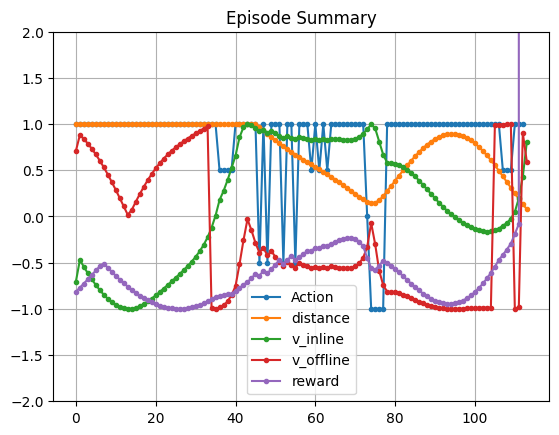

In [22]:
# Plot human readable inputs / outputs
reward_mult = env.training_length_frames / .4
plt.plot(actions, '.-')
plt.plot(obs[:, 4], '.-')
plt.plot(obs[:, 2], '.-')
plt.plot(obs[:, 3], '.-')
plt.plot(np.array(rewards)*reward_mult, '.-')
plt.legend(["Action", 'distance', "v_inline", 'v_offline', 'reward'])
plt.ylim([-2, 2])
plt.grid()
plt.title("Episode Summary")
None

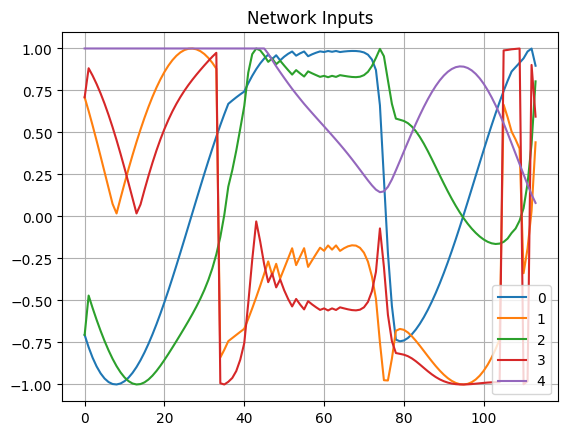

In [20]:
n = 5
plt.figure()
plt.plot(obs[:, 0:n])
plt.legend(list(range(n)))
plt.title("Network Inputs")
plt.grid()